# Part 1

In [75]:
import pandas as pd
import wikipedia as wp
from bs4 import BeautifulSoup

In [76]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

In [77]:
df = pd.read_html(html, header = 0)[0]
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [78]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Rouge, Malvern"
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
6,M1J,Scarborough,Scarborough Village
7,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
8,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
9,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"


# Part 2

In [79]:
import requests
import io

In [80]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [81]:
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

In [82]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


# Part 3

In [83]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

In [84]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.head()
#gdf['Coordinates'].head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Coordinates
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,POINT (-79.19435340000001 43.8066863)
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,POINT (-79.16049709999999 43.7845351)
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,POINT (-79.1887115 43.7635726)
3,M1G,Scarborough,Woburn,43.770992,-79.216917,POINT (-79.21691740000001 43.7709921)
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,POINT (-79.23947609999999 43.773136)


In [85]:
map = folium.Map(location=[43.651070, -79.347015], zoom_start=12)

In [88]:
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Borough'][point]).add_to(map)
map

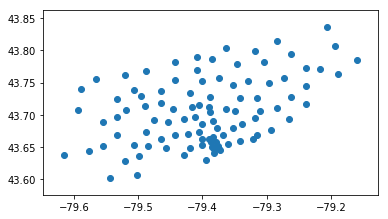

In [89]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot()

gdf.plot(ax=ax)
plt.show()